Lending Club Loan Data Analysis
Course-end Project 2
Description

Create a model that predicts whether or not a loan will be default using the historical data.

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model.
Dataset columns and definition:


credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tx liens, or judgments).

 

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

To download the data sets click here  

Content: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
import csv
# csv file name
df = pd.read_csv(r'D:\OneDrive\Knowledge Center\AI - ML\Masters in Artifical Engineer\Deep Learning with Keras and Tensorflow\Notebooks\1585898503_datasets\loan_data.csv') 


Basic Data Check

In [21]:
# Check the first few rows of the DataFrame
print(df.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

In [41]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,income_to_debt,fico_range_Poor,fico_range_Fair,fico_range_Good,fico_range_Excellent
0,1,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,...,True,False,False,False,False,0.582670,False,True,False,False
1,1,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,...,False,False,False,False,False,0.775517,False,True,False,False
2,1,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,...,True,False,False,False,False,0.891960,True,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,...,True,False,False,False,False,1.401285,False,True,False,False
4,1,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,...,False,False,False,False,False,0.754825,True,False,False,False


In [22]:
# Check the summary statistics
print(df.describe())

       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.0000

In [23]:
# Check for missing values
print(df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


No data is missing, there there is no need to fill in with mean or modal data

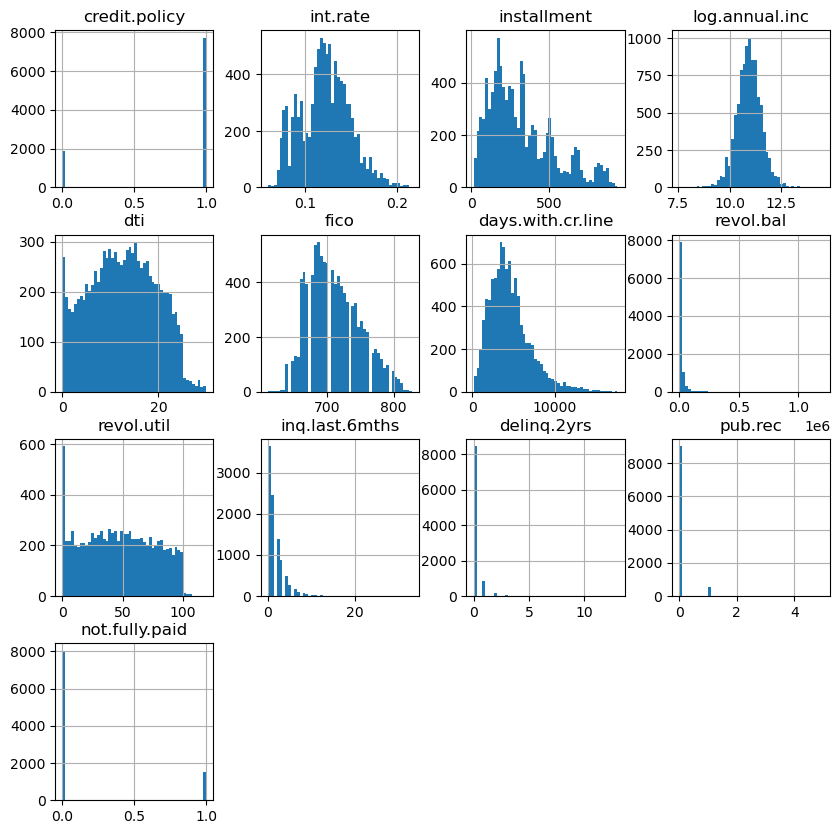

In [24]:
# Plot histograms for each variable
df.hist(figsize=(10, 10), bins=50)
plt.show()

In [25]:
#Checking for outliers
from scipy.stats import zscore

def detect_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [26]:
def remove_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            data = data[data != i]
    return data

function calculates the Z-score for each value in the data, and if the Z-score is greater than the specified threshold. The Z-score method of outlier detection uses a threshold, typically of 3 or -3, which corresponds to data points that are 3 standard deviations away from the mean. This is based on the empirical rule or the 68-95-99.7 rule, which states that nearly all data lies within 3 standard deviations of the mean in a normal distribution.Now printing them

In [27]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        outliers = detect_outliers(df[column])
        print(f'Outliers in {column}: {outliers}')
        df[column] = remove_outliers(df[column])

Outliers in credit.policy: []
Outliers in int.rate: [0.2086, 0.2086, 0.2121, 0.2121, 0.2086, 0.2121, 0.2052, 0.2121, 0.209, 0.2052, 0.2086, 0.2086, 0.2121, 0.2052, 0.2121, 0.2121, 0.2086, 0.2052, 0.209, 0.2164, 0.2164]
Outliers in installment: []
Outliers in log.annual.inc: [8.987196821, 13.08154138, 13.33100224, 8.517193191, 13.16542287, 12.8346813, 8.9751293, 13.25759333, 14.52835448, 9.047821442, 13.12236338, 8.342839804, 12.87390202, 8.998136761, 8.612503371, 8.987196821, 8.476371197, 13.45883561, 13.30468493, 13.01700286, 8.494538501, 8.853665428, 8.987196821, 8.29404964, 8.987196821, 13.45883561, 13.5670492, 12.79385931, 13.08154138, 13.48700649, 8.699514748, 14.12446477, 13.71015004, 8.476371197, 13.71015004, 8.699514748, 14.18015367, 12.82395734, 13.47019937, 13.54370183, 13.00357984, 13.5670492, 13.99783211, 8.881836305, 13.36295384, 13.30468493, 12.85839783, 13.142166, 12.94800999, 13.30468493, 8.9226583, 8.699514748, 8.779557456, 8.29404964, 8.29404964, 8.853665428, 13.12236

In [28]:
# Check the summary statistics
print(df.describe())

       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9557.000000  9578.000000     9492.000000  9578.000000   
mean        0.804970     0.122448   319.089413       10.932222    12.606679   
std         0.396245     0.026562   207.071301        0.575705     6.883970   
min         0.000000     0.060000    15.670000        9.169518     0.000000   
25%         1.000000     0.103900   163.770000       10.571317     7.212500   
50%         1.000000     0.122100   268.950000       10.929887    12.665000   
75%         1.000000     0.139900   432.762500       11.289782    17.950000   
max         1.000000     0.201700   940.140000       12.765700    29.960000   

              fico  days.with.cr.line      revol.bal   revol.util  \
count  9577.000000        9436.000000    9419.000000  9578.000000   
mean    710.834186        4424.895833   13726.008706    46.799236   
std      37.953962        2249.876766   16775.258870    29.014417   
min     612.

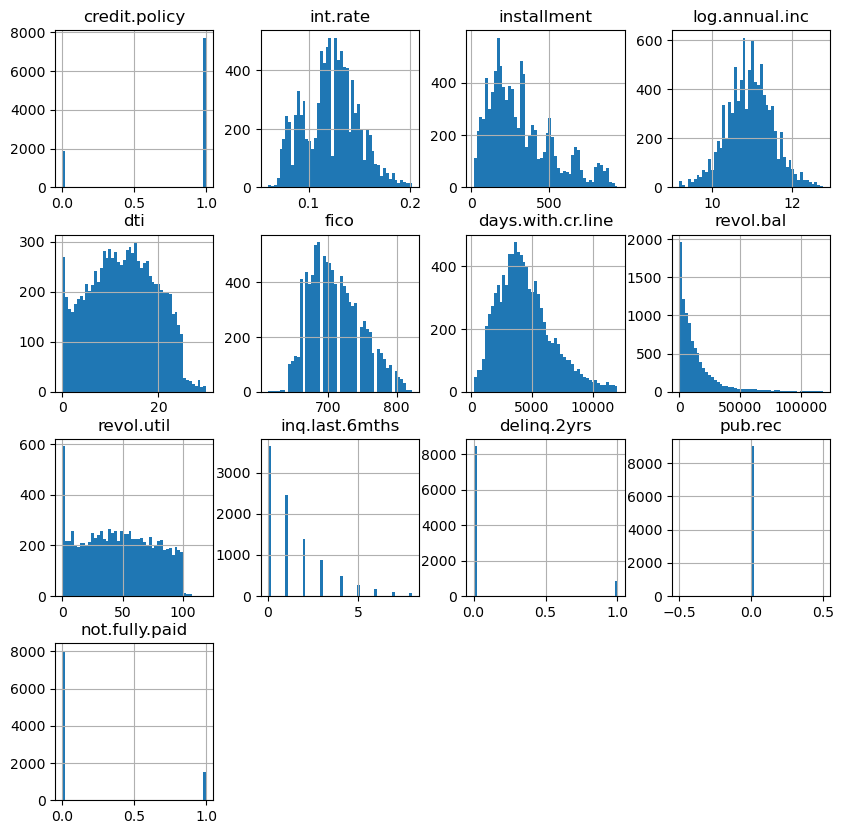

In [29]:
# Plot histograms for each variable
df.hist(figsize=(10, 10), bins=50)
plt.show()

In [30]:
# Select columns containing categorical data
categorical_columns = df.select_dtypes(include=['object']).columns

print("Categorical columns in the DataFrame:")
for column in categorical_columns:
    print(column)

print("\nUnique values in each categorical column:")
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")

Categorical columns in the DataFrame:
purpose

Unique values in each categorical column:
purpose: ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


We’ll convert the categorical variables into dummy variables: Using one-hot encoding

In [31]:
df = pd.get_dummies(df, drop_first=True)

Feature engineering. feature engineering is an iterative and experimental process guided by trying out different ideas and checking if they improve your model’s performance.
1. Interaction Features: You can create new features that are interactions of existing features. ‘income_to_debt’ which is the ratio of ‘log.annual.inc’ to ‘dti’.
df['income_to_debt'] = df['log.annual.inc'] / df['dti']
2. Polynomial Features: useful if the relationship between the feature and the target is non-linear.
3. Binning: You can also bin numerical variables to convert them into categorical variables. This is useful for variables like ‘fico’ where different ranges could have different default probabilities.
4. Feature Scaling: This includes algorithms that use a weighted sum of the input, like linear regression, and algorithms that use distance measures, like k-nearest neighbors. Using MinMaxScalar

In [34]:
#Interaction Features - income_to_debt_ratio
df['income_to_debt'] = df['log.annual.inc'] / df['dti']
#Polynomial Features: - fico
df['fico_squared'] = df['fico'] ** 2
#Binning
df['fico_range'] = pd.cut(df['fico'], bins=[0, 650, 700, 750, 800, 850], labels=['Very Poor', 'Poor', 'Fair', 'Good', 'Excellent'])
#Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['scaled_fico'] = scaler.fit_transform(df[['fico']])

In [37]:
#Have introduced fico_range which is categorical. Need one-hot encoding for that too 
df = pd.get_dummies(df, drop_first=True)

In [38]:
# Check the updated DataFrame
print(df.head())

   credit.policy  int.rate  installment  log.annual.inc    dti   fico  \
0              1    0.1189       829.10       11.350407  19.48  737.0   
1              1    0.1071       228.22       11.082143  14.29  707.0   
2              1    0.1357       366.86       10.373491  11.63  682.0   
3              1    0.1008       162.34       11.350407   8.10  712.0   
4              1    0.1426       102.92       11.299732  14.97  667.0   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  ...  \
0        5639.958333    28854.0        52.1             0.0  ...   
1        2760.000000    33623.0        76.7             0.0  ...   
2        4710.000000     3511.0        25.6             1.0  ...   
3        2699.958333    33667.0        73.2             1.0  ...   
4        4066.000000     4740.0        39.5             0.0  ...   

   purpose_home_improvement  purpose_major_purchase  purpose_small_business  \
0                     False                   False                   Fal

C:\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


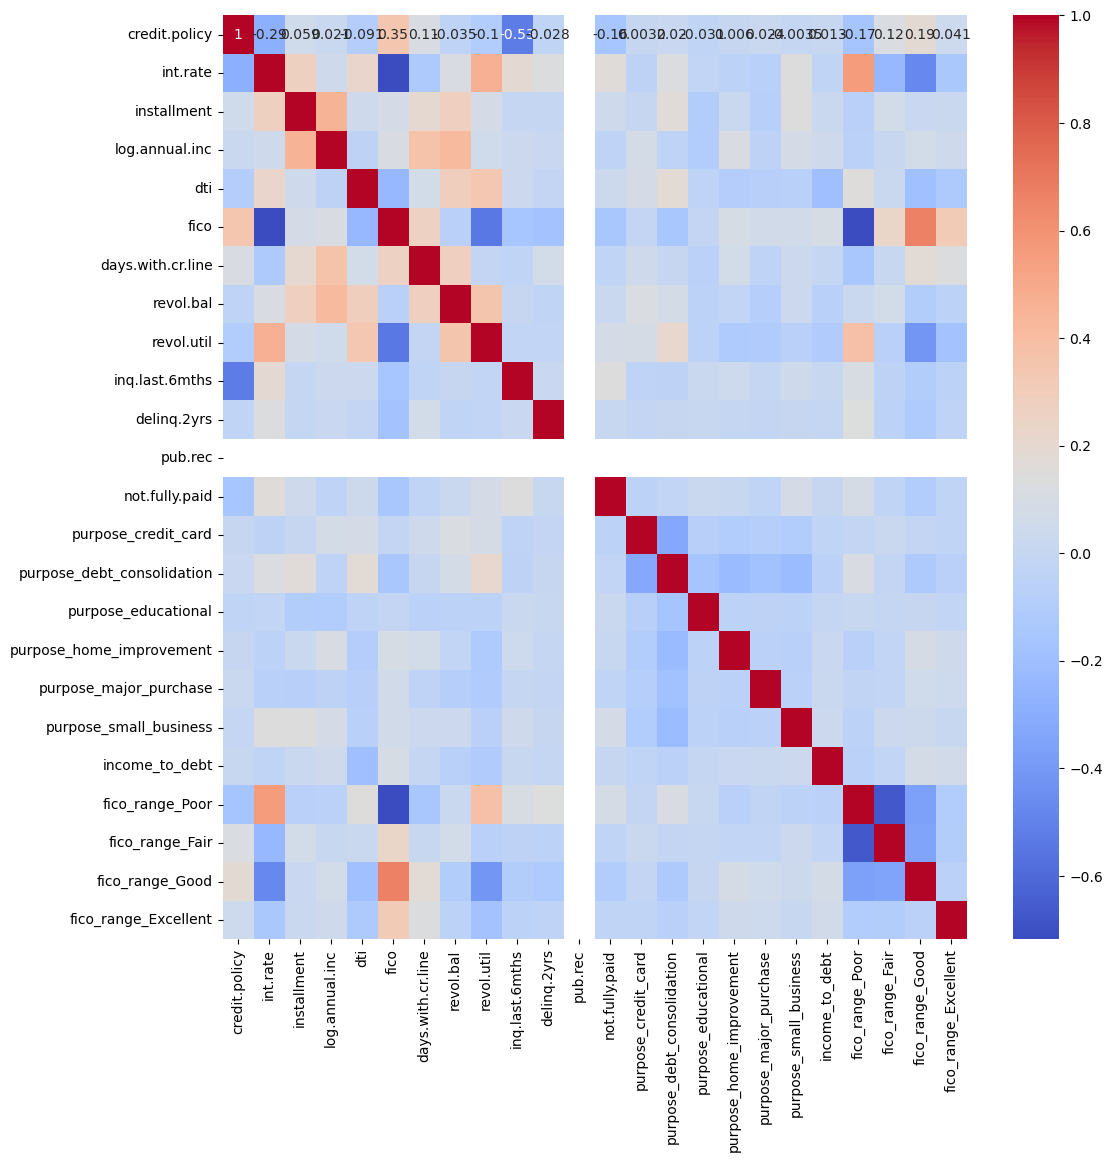

In [45]:
import seaborn as sns
# Additional Feature Engineering
# Correlation Matrix
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [52]:
#Show higly correlated columns and remove them
columns = np.full((corr_matrix.shape[0],), True, dtype=bool)
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        print(corr_matrix.iloc[i,j]) 
        if corr_matrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

-0.29148462629776906
0.05876961631321294
0.02063948805862432
-0.09090056913279637
0.3483360957969314
0.10977458786199744
-0.03547714461092405
-0.10409494555108892
-0.52662328019139
-0.028298880951978054
nan
-0.1581191503140471
0.0032161339031254333
0.020193497516531767
-0.03134560437416619
0.00603586312466811
0.024280687188155115
-0.0035112537939735325
0.012883662127726155
-0.1666714947965311
0.11863810116249128
0.18539145041273264
0.04132450173931782
0.27163491047519356
0.05067666847620666
0.22318344148596397
-0.7177785360338564
-0.12447392044117564
0.11254492052694882
0.46753890910357926
0.1923960400176897
0.12851311677171215
nan
0.15827464753464426
-0.04081495761283574
0.12501166786558532
-0.018458282164694313
-0.05226932539561881
-0.06821729788196083
0.14595054374814567
-0.03145427620721436
0.5595751560779518
-0.23490668011704963
-0.4704961305217298
-0.1399250967649121
0.450905488771987
0.05020184110319647
0.08597240557969194
0.19664193603770116
0.27669163656484574
0.08135621749582

In [ ]:
#As we see we do not have any highly correlated columns. 

In [40]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,income_to_debt,fico_range_Poor,fico_range_Fair,fico_range_Good,fico_range_Excellent
0,1,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,...,True,False,False,False,False,0.582670,False,True,False,False
1,1,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,...,False,False,False,False,False,0.775517,False,True,False,False
2,1,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,...,True,False,False,False,False,0.891960,True,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,...,True,False,False,False,False,1.401285,False,True,False,False
4,1,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,...,False,False,False,False,False,0.754825,True,False,False,False


In [62]:
# Check for infinity
if np.any(np.isinf(df)):
    print("DataFrame contains infinity. REmoving them")
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN
if df.isnull().values.any():
    print("DataFrame contains NaN values. . REmoving them")
    df.dropna(inplace=True)  # drop NaN values

In [63]:
#EDA is done. building the predictive models
#Now, let’s split the data into a training set and a test set:
X = df.drop('credit.policy', axis=1)
y = df['credit.policy']


In [64]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Fit the scaler to the features and transform
# Fit the scaler to the features and transform
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [70]:
# Check for infinity
if np.any(np.isinf(X_train)) or np.any(np.isinf(X_test)):
    print("DataFrame contains infinity")
    X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN
if X_train.isnull().values.any() or X_test.isnull().values.any():
    print("DataFrame contains NaN values")
    X_train.dropna(inplace=True)  # drop NaN values
    X_test.dropna(inplace=True)  # drop NaN values



In [71]:
#build and train a deep learning model:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
206/206 [==============================] - 2s 5ms/step - loss: 0.4561 - accuracy: 0.7952 - val_loss: 0.3334 - val_accuracy: 0.8544
Epoch 2/10
206/206 [==============================] - 1s 4ms/step - loss: 0.2857 - accuracy: 0.8859 - val_loss: 0.2361 - val_accuracy: 0.9238
Epoch 3/10
206/206 [==============================] - 1s 4ms/step - loss: 0.2417 - accuracy: 0.9145 - val_loss: 0.2186 - val_accuracy: 0.9250
Epoch 4/10
206/206 [==============================] - 1s 4ms/step - loss: 0.2321 - accuracy: 0.9185 - val_loss: 0.2148 - val_accuracy: 0.9250
Epoch 5/10
206/206 [==============================] - 1s 3ms/step - loss: 0.2256 - accuracy: 0.9183 - val_loss: 0.2087 - val_accuracy: 0.9281
Epoch 6/10
206/206 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9202 - val_loss: 0.2047 - val_accuracy: 0.9299
Epoch 7/10
206/206 [==============================] - 1s 3ms/step - loss: 0.2127 - accuracy: 0.9215 - val_loss: 0.2030 - val_accuracy: 0.9257
Epoch 

In [74]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

52/52 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9348
Loss: 0.190029576420784, Accuracy: 0.9347958564758301


In [78]:
# Get the predicted values
y_pred = model.predict(X_test)

# Since the model outputs probabilities, convert probabilities to class labels
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred]

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Calculate the difference
comparison['Difference'] = comparison['Actual'] - comparison['Predicted']

# Print the DataFrame
print(comparison)


52/52 [==============================] - 0s 1ms/step
      Actual  Predicted  Difference
1419       1          1           0
3904       1          1           0
9408       0          0           0
9364       0          0           0
1025       1          1           0
...      ...        ...         ...
9501       0          0           0
8618       0          0           0
1392       1          1           0
1617       1          0           1
6495       1          1           0

[1641 rows x 3 columns]


In [81]:
from sklearn.metrics import roc_curve, auc, recall_score
import matplotlib.pyplot as plt

# Get the predicted probabilities
y_pred_proba = model.predict(X_test)

52/52 [==============================] - 0s 1ms/step


Sensitivity: 0.978955007256894


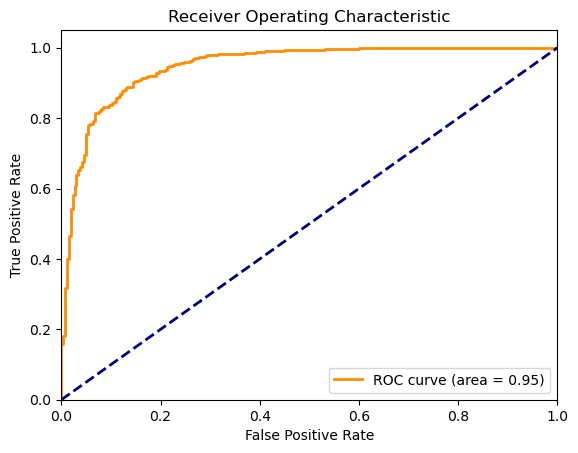

In [83]:
# Calculate sensitivity/recall
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred]
sensitivity = recall_score(y_test, y_pred)
print(f'Sensitivity: {sensitivity}')

# Calculate ROC curve (fpr: false positive rate, tpr: true positive rate)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
